In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plot
import numpy as np # álgebra linear
import os # acesso ao diretório
import pandas as pd # processamento dos dados .csv
import math
from starter_pack.func_analysis import plotPerColumnDistribution, plotCorrelationMatrix, plotScatterMatrix

/home/rafatokairin/uni-programs/ic/mass_case_description_train_set.ipynb
/home/rafatokairin/uni-programs/ic/calc_case_description_test_set.ipynb
/home/rafatokairin/uni-programs/ic/meta.ipynb
/home/rafatokairin/uni-programs/ic/dicom_info.ipynb
/home/rafatokairin/uni-programs/ic/__pycache__/func_analysis.cpython-310.pyc
/home/rafatokairin/uni-programs/ic/starter_pack/starter-cbis-ddsm-breast-cancer-image-eef73d6f-4.ipynb
/home/rafatokairin/uni-programs/ic/starter_pack/func_analysis.py
/home/rafatokairin/uni-programs/ic/starter_pack/__pycache__/func_analysis.cpython-310.pyc
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.225893167712705639706899641612088401339/1-235.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.2448529311758051613285357123953923871/1-227.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.192830829713156688526768249872322016275/1-142.jpg
/home/rafatokairin/uni-programs/ic/jpeg/1.3.6.1.4.1.9590.100.1.2.11335012001262

### Vamos verificar 4st arquivo: /kaggle/input/csv/dicom_info.csv

In [2]:
nRowsRead = 1000 # especifique 'None' se quiser ler o arquivo inteiro
# dicom_info.csv pode ter mais linhas na realidade, mas estamos carregando/visualizando apenas as primeiras 1000 linhas
df4 = pd.read_csv('/home/rafatokairin/uni-programs/ic/csv/dicom_info.csv', delimiter=',', nrows = nRowsRead)
df4.dataframeName = 'dicom_info.csv'
nRow, nCol = df4.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 38 columns


Vamos dar uma olhada rápida em como os dados se apresentam:

In [3]:
df4.head(5)

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [4]:
# dimensões do arquivo
df4.shape

(1000, 38)

In [5]:
# informações do arquivo
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    1000 non-null   object 
 1   image_path                                   1000 non-null   object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                1000 non-null   int64  
 4   BitsStored                                   1000 non-null   int64  
 5   BodyPartExamined                             1000 non-null   object 
 6   Columns                                      1000 non-null   int64  
 7   ContentDate                                  1000 non-null   int64  
 8   ContentTime                                  1000 non-null   float64
 9   ConversionType                               1000 non-null   object 
 10  H

In [6]:
df4.isnull().sum()

file_path                                         0
image_path                                        0
AccessionNumber                                1000
BitsAllocated                                     0
BitsStored                                        0
BodyPartExamined                                  0
Columns                                           0
ContentDate                                       0
ContentTime                                       0
ConversionType                                    0
HighBit                                           0
InstanceNumber                                    0
LargestImagePixelValue                            0
Laterality                                       66
Modality                                          0
PatientBirthDate                               1000
PatientID                                         0
PatientName                                       0
PatientOrientation                                0
PatientSex  

Verificar os valores únicos em cada coluna

In [7]:
valores_unicos = []
for i in df4.columns[0:39].tolist():
    print(i, ':', len(df4[i].astype(str).value_counts()))
    valores_unicos.append(len(df4[i].astype(str).value_counts()))

file_path : 1000
image_path : 1000
AccessionNumber : 1
BitsAllocated : 2
BitsStored : 2
BodyPartExamined : 3
Columns : 517
ContentDate : 4
ContentTime : 671
ConversionType : 1
HighBit : 2
InstanceNumber : 1
LargestImagePixelValue : 43
Laterality : 3
Modality : 1
PatientBirthDate : 1
PatientID : 712
PatientName : 699
PatientOrientation : 2
PatientSex : 1
PhotometricInterpretation : 1
PixelRepresentation : 1
ReferringPhysicianName : 1
Rows : 436
SOPClassUID : 1
SOPInstanceUID : 1000
SamplesPerPixel : 1
SecondaryCaptureDeviceManufacturer : 2
SecondaryCaptureDeviceManufacturerModelName : 1
SeriesDescription : 4
SeriesInstanceUID : 671
SeriesNumber : 1
SmallestImagePixelValue : 295
SpecificCharacterSet : 1
StudyDate : 9
StudyID : 1
StudyInstanceUID : 671
StudyTime : 854


In [8]:
df4.describe()

,AccessionNumber,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,HighBit,InstanceNumber,LargestImagePixelValue,PatientBirthDate,PatientSex,PixelRepresentation,ReferringPhysicianName,Rows,SamplesPerPixel,SeriesNumber,SmallestImagePixelValue,StudyDate,StudyTime
count,0.0,1000.00000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.0,1000.000000,0.0,0.0,1000.0,0.0,1000.000000,1000.0,1000.0,1000.000000,9.340000e+02,934.000000
mean,NaN,13.23200,13.23200,2175.046000,2.016047e+07,122971.969388,12.23200,1.0,42715.271000,NaN,NaN,0.0,NaN,3591.826000,1.0,1.0,8674.103000,2.016441e+07,157940.194861
std,NaN,3.80745,3.80745,1335.257997,4.210159e+01,12097.878703,3.80745,0.0,30923.117977,NaN,NaN,0.0,NaN,2333.821357,0.0,0.0,14824.187881,4.832690e+03,50687.650739
min,NaN,8.00000,8.00000,77.000000,2.016041e+07,82759.495003,7.00000,1.0,255.000000,NaN,NaN,0.0,NaN,81.000000,1.0,1.0,0.000000,2.016072e+07,82241.000000
25%,NaN,8.00000,8.00000,503.750000,2.016043e+07,113244.775750,7.00000,1.0,255.000000,NaN,NaN,0.0,NaN,487.000000,1.0,1.0,0.000000,2.016072e+07,90838.500000
50%,NaN,16.00000,16.00000,2716.000000,2.016050e+07,122748.122000,15.00000,1.0,65535.000000,NaN,NaN,0.0,NaN,4640.000000,1.0,1.0,0.000000,2.016081e+07,170942.500000
75%,NaN,16.00000,16.00000,3091.750000,2.016050e+07,132054.169000,15.00000,1.0,65535.000000,NaN,NaN,0.0,NaN,5446.000000,1.0,1.0,17020.750000,2.017083e+07,214736.000000
max,NaN,16.00000,16.00000,5071.000000,2.016060e+07,160501.169000,15.00000,1.0,65535.000000,NaN,NaN,0.0,NaN,6916.000000,1.0,1.0,57821.000000,2.017093e+07,215547.000000


Gráficos de distribuição (histograma/gráfico de barras) das colunas amostradas:

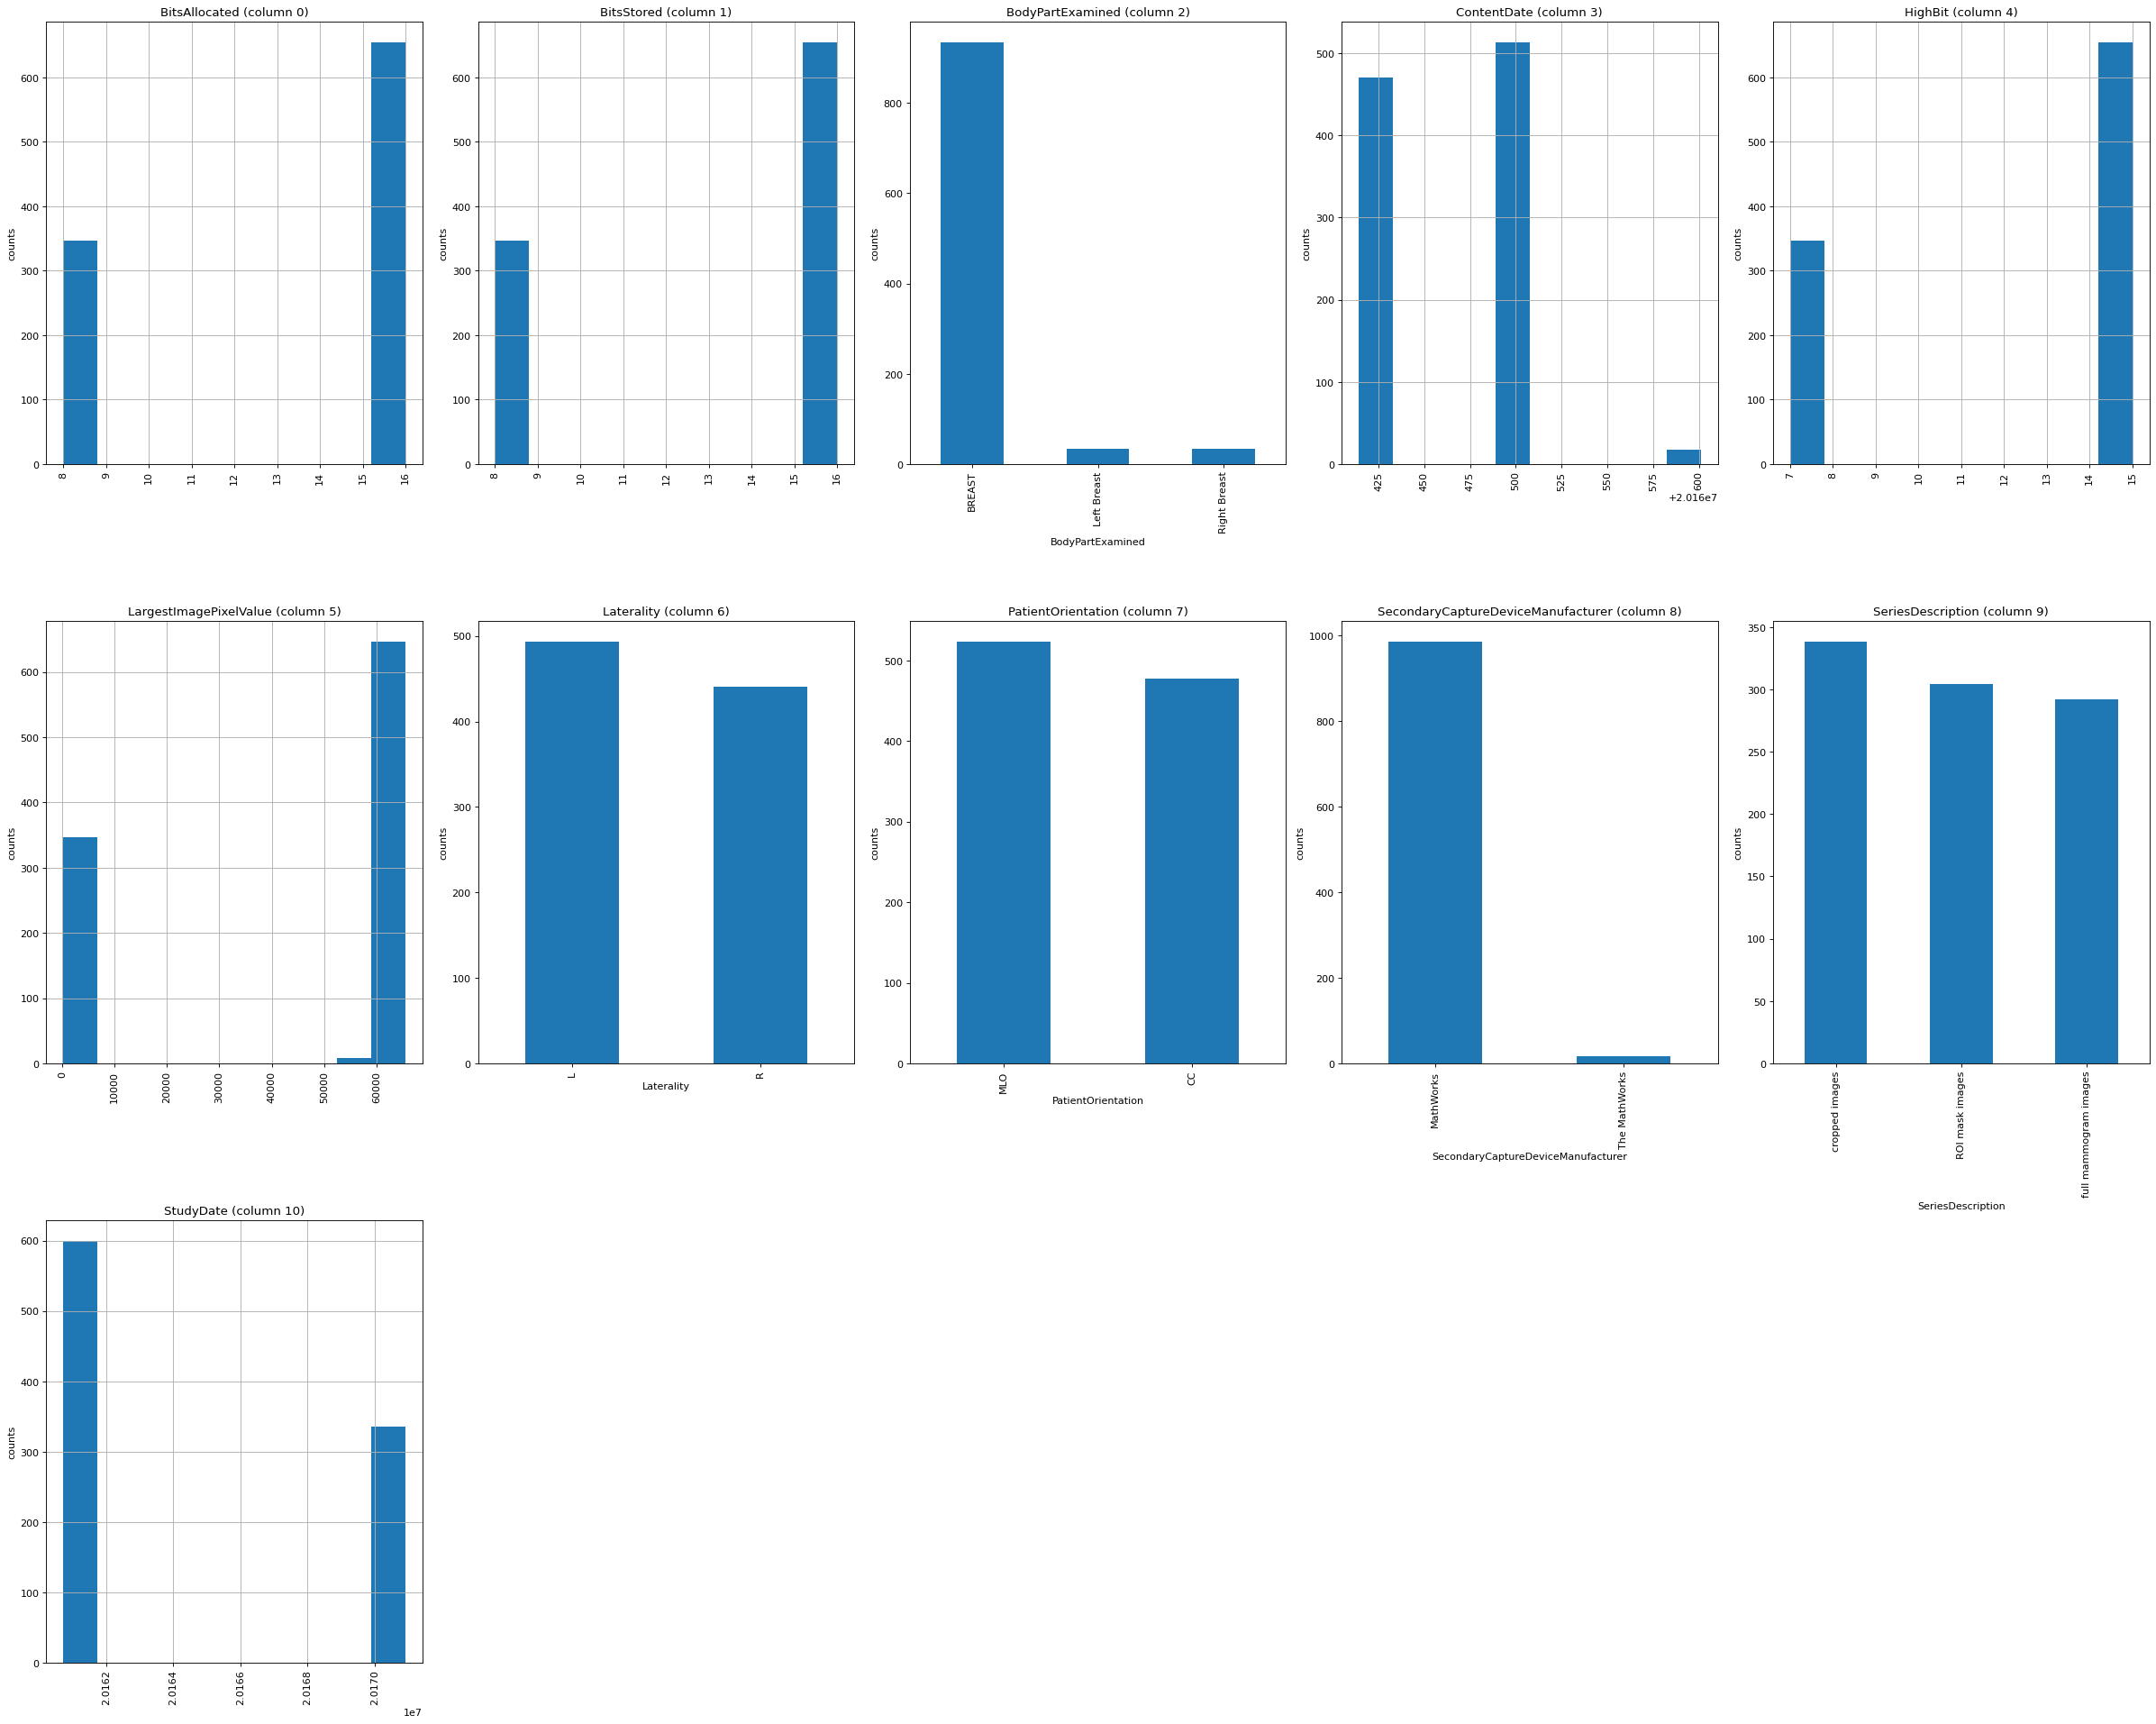

In [9]:
plotPerColumnDistribution(df4, 11, 5)

Matriz de correlação:

<Figure size 640x640 with 0 Axes>

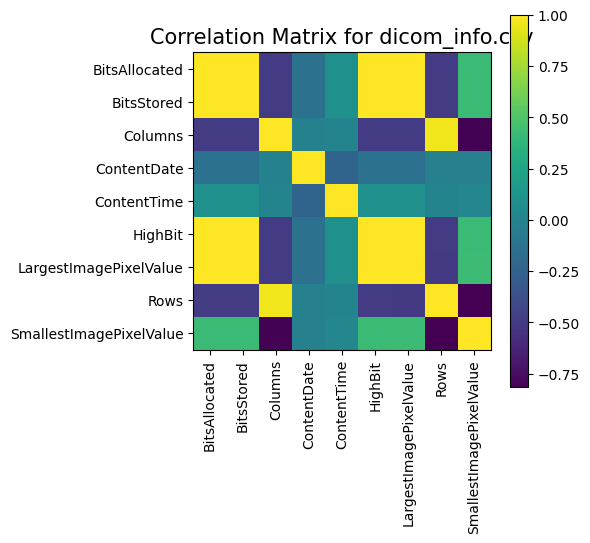

In [10]:
plotCorrelationMatrix(df4, 8)

Gráficos de dispersão e densidade:

In [ ]:
plotScatterMatrix(df4, 15, 10)

TypeError: plotScatterDensity() takes from 1 to 2 positional arguments but 3 were given